In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, KFold, learning_curve, permutation_test_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

In [72]:
df = pd.read_csv('..\\data\\regression\\AMES_Final_DF.csv')

In [29]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(pipe, X_train, y_train, scoring={'rmse': 'neg_root_mean_squared_error', 'r2':'r2'}, cv=cv, verbose=0, return_train_score=True)
print(f"Среднее время затраченное на стандартизацию и обучение модели: {scores['fit_time'].mean():.5f}")
print(f"Среднее время затраченное на вычисление ошибок RMSE и R2: {scores['score_time'].mean():.5f}")
print(f"Средняя оценка RMSE на val: {-scores['test_rmse'].mean():.3f} +- {scores['test_rmse'].std():.3f}")
print(f"Средняя оценка R2 на val: {scores['test_r2'].mean():.3f} +- {scores['test_r2'].std():.3f}")
print(f"Средняя оценка RMSE | R2 на train: {-scores['train_rmse'].mean():.3f} | {scores['train_r2'].mean():.3f}")


Среднее время затраченное на стандартизацию и обучение модели: 0.07548
Среднее время затраченное на вычисление ошибок RMSE и R2: 0.00455
Средняя оценка RMSE на val: 24710.842 +- 1417.542
Средняя оценка R2 на val: 0.902 +- 0.016
Средняя оценка RMSE | R2 на train: 18914.987 | 0.944


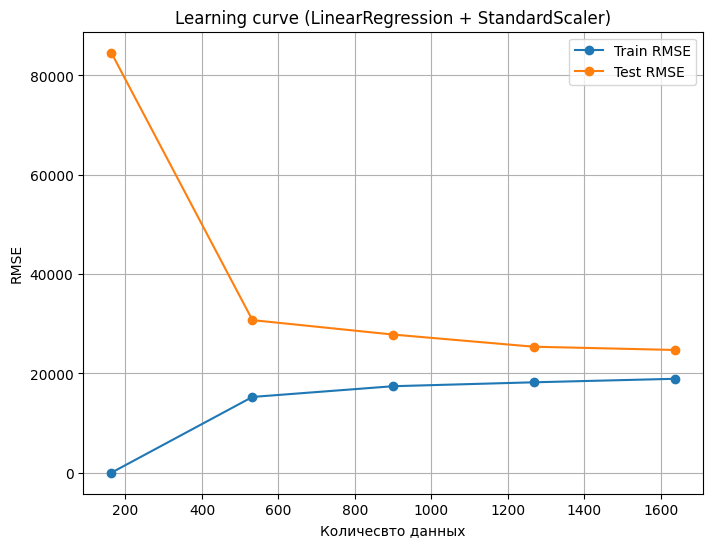

In [108]:
train_sizes, train_scores, test_scores = learning_curve(pipe, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
train_scores_mean, test_scores_mean = np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)
plt.figure(figsize=(8,6), dpi=100)
plt.plot(train_sizes, -train_scores_mean, marker='o', label="Train RMSE")
plt.plot(train_sizes, -test_scores_mean, marker='o', label="Test RMSE")
plt.xlabel('Количесвто данных')
plt.ylabel('RMSE')
plt.legend()
plt.title('Learning curve (LinearRegression + StandardScaler)')
plt.grid()
plt.show()

In [118]:
score, premutation_score, p_value = permutation_test_score(pipe, X_train, y_train, cv=cv, random_state=42, n_jobs=-1, scoring='r2')
print(f'Оригинальная оценка: {score:.3f}')
print(f'Оценка после перемешивания ответов: {premutation_score.mean():.3f}')
print(f'p_value: {p_value:.3f}')

Оригинальная оценка: 0.902
Оценка после перемешивания ответов: -0.236
p_value: 0.010


In [90]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
RMSE = root_mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f'RMSE на test: {RMSE:.3f}')
print(f'R2 на test: {R2:.3f}')

RMSE на test: 21461.048
R2 на test: 0.928
